In [1]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("../Lab2/Data2/Titanic_cleaned_data.csv", sep=',')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,HasCabin,Title,CatAge,CatFare,Embarked_Q,Embarked_S,Embarked_C,Title_Mr,Title_Miss,Title_Mrs,Title_Unique
0,1,0.0,3,male,22.000000,1,0,False,Mr,0,0,False,True,False,True,False,False,False
1,2,1.0,1,female,38.000000,1,0,True,Mrs,3,3,False,False,True,False,False,True,False
2,3,1.0,3,female,26.000000,0,0,False,Miss,1,1,False,True,False,False,True,False,False
3,4,1.0,1,female,35.000000,1,0,True,Mrs,2,3,False,True,False,False,False,True,False
4,5,0.0,3,male,35.000000,0,0,False,Mr,2,1,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,29.881138,0,0,False,Mr,1,1,False,True,False,True,False,False,False
1305,1306,NaN,1,female,39.000000,0,0,True,Unique,3,3,False,False,True,False,False,False,True
1306,1307,NaN,3,male,38.500000,0,0,False,Mr,3,0,False,True,False,True,False,False,False
1307,1308,NaN,3,male,29.881138,0,0,False,Mr,1,1,False,True,False,True,False,False,False


In [3]:
#Task 1
df_train = Titanic_cleaned_data[Titanic_cleaned_data['Survived'].notnull()]
df_test = Titanic_cleaned_data[Titanic_cleaned_data['Survived'].isna()]

df.to_csv('../Lab3/Data3/df_train.csv')
df.to_csv('../Lab3/Data3/df_test.csv')

NameError: name 'Titanic_cleaned_data' is not defined

In [263]:
#Task 2
df['TravelAlone'] = (df['SibSp'] + df['Parch'] == 0).astype(int)
df['TravelAlone'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: TravelAlone
Non-Null Count  Dtype
--------------  -----
1309 non-null   int32
dtypes: int32(1)
memory usage: 5.2 KB


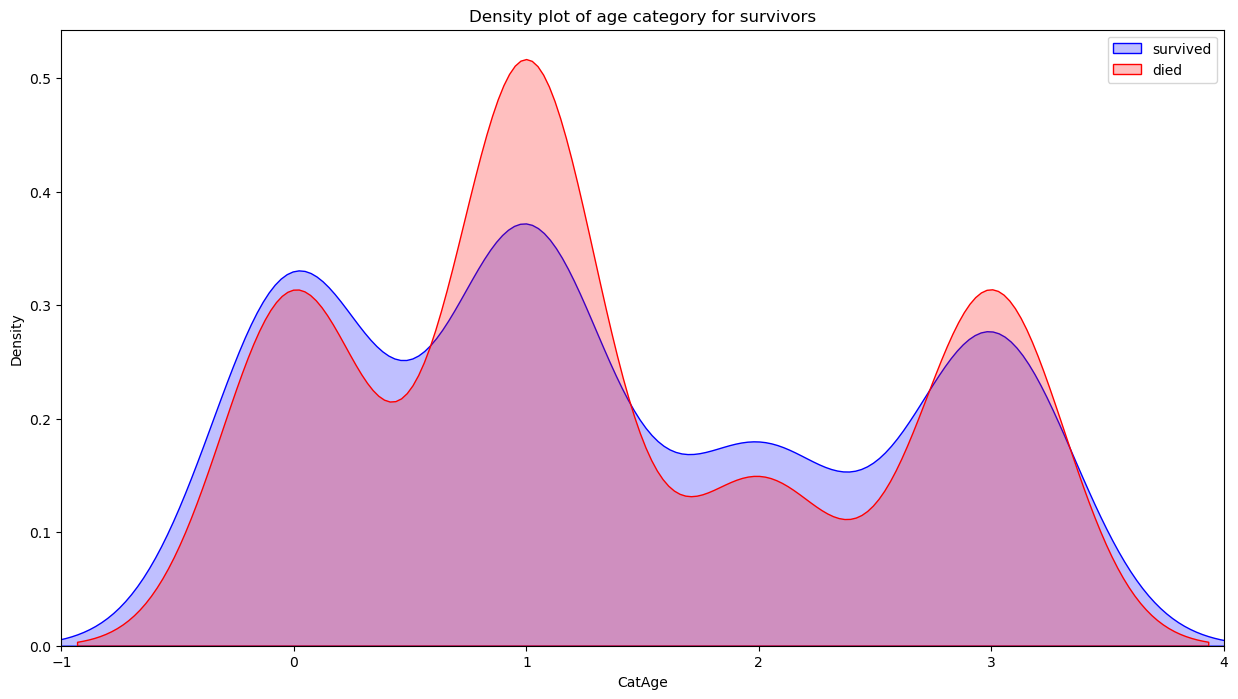

In [264]:
#Task 3
#3.1 Visualize the impact of age categories on survival using a density plot.

#size of the chart
plt.figure(figsize=(15,8))

#The variables
sns.kdeplot(df_train['CatAge'][df_train.Survived == 1], color="blue", fill=True)
sns.kdeplot(df_train['CatAge'][df_train.Survived == 0], color="red", fill=True)

#Title of chart and elements (survived, died)
plt.legend(['survived', "died"])
plt.title("Density plot of age category for survivors")

#X and Y labels
ax.set(xlabel="Age")
ax.set(ylabel="Density")

#Ensuring that the size of the chart shows all age categories (1-3)
plt.xlim(-1,4)
plt.show()

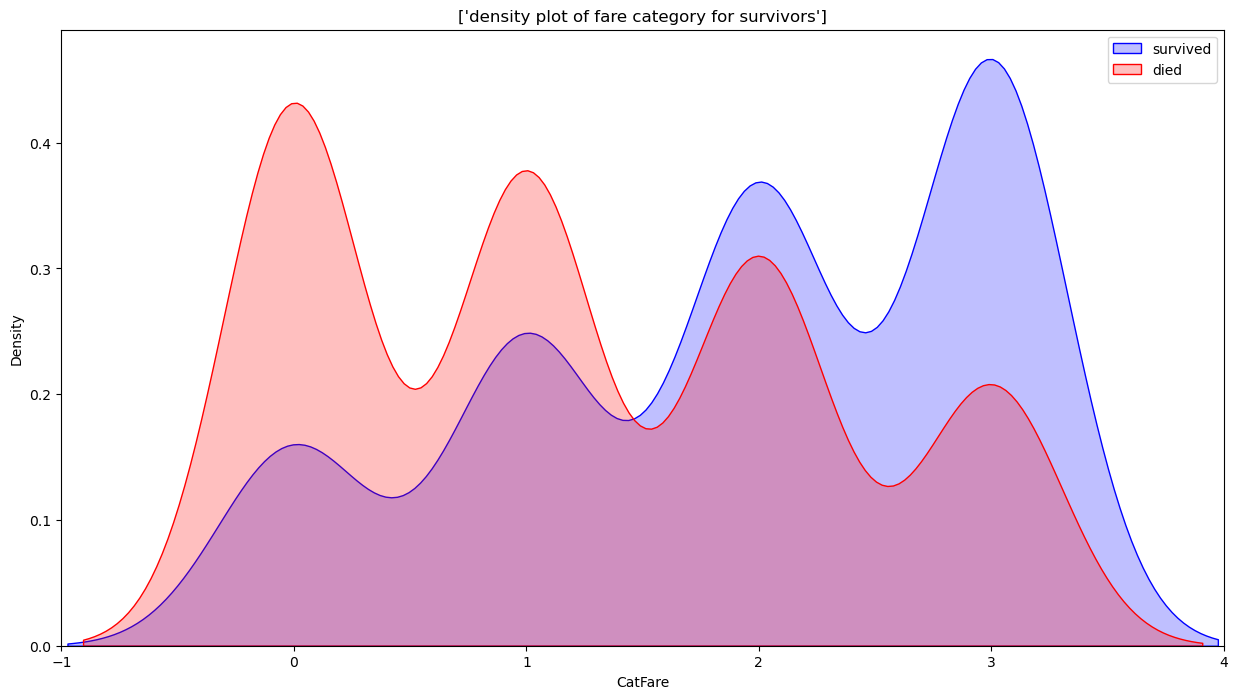

In [265]:
#3.2 Analyze other features

#Size of the chart
plt.figure(figsize=(15,8))

#The variables
sns.kdeplot(df_train['CatFare'][df_train.Survived == 1], color="blue", fill=True)
sns.kdeplot(df_train['CatFare'][df_train.Survived == 0], color="red", fill=True)

#Title of the chart and elements
plt.legend(["survived", "died"])
plt.title(["density plot of fare category for survivors"])

# X and Y labels
ax.set(xlabel="Fare")
ax.set(ylabel="Density")

#limiting size of the chart
plt.xlim(-1,4)
plt.show()

231
330
113
217


C:\Users\dorde\AppData\Local\Temp\ipykernel_5564\4255283312.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=catage_labels, y=catage_counts, palette='viridis')


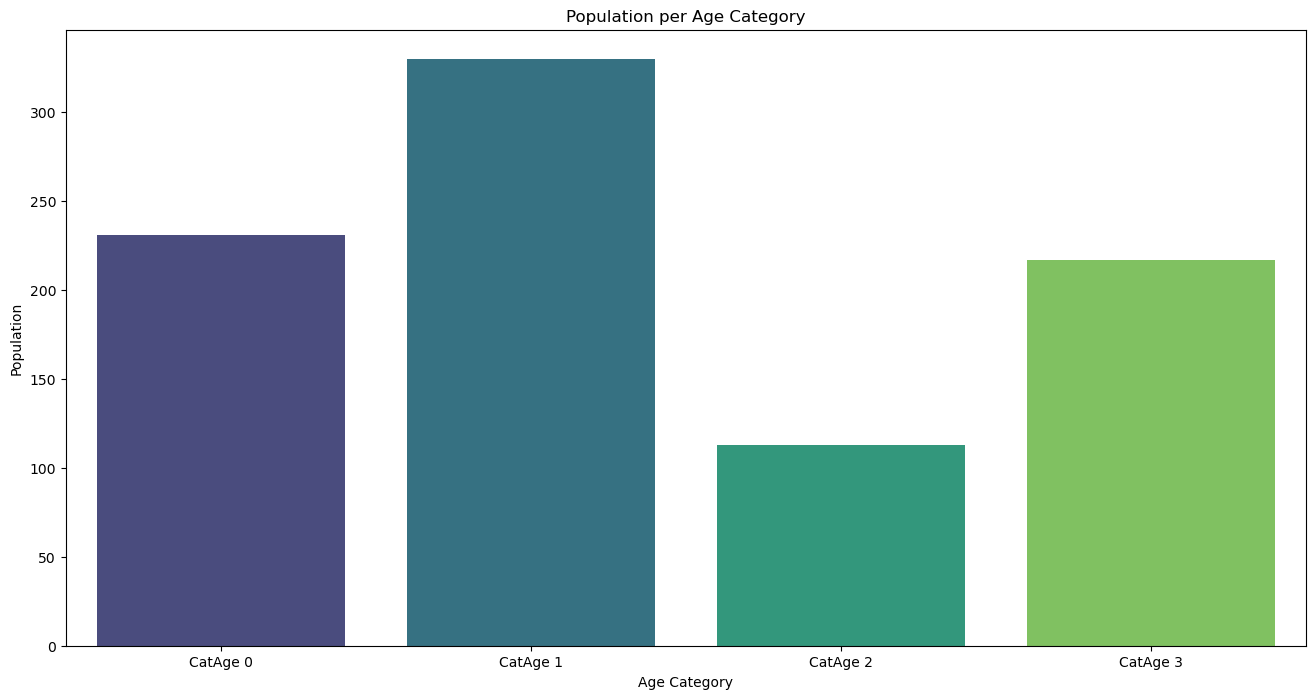

In [266]:
# 3.3 Interpret the plots and write down your observations.

# For the AgeCat plot there is a direct correlation between how many passengers were present of the different age categories with how many died.
# If the density plot was put over the barplot underneath the variables (death and population) would align

# As for the FareCat plot i would guess that the population with high fare costs also got easier access to lifeboat and areas that are safer


print(df_train['CatAge'][df_train.CatAge == 0].count())
print(df_train['CatAge'][df_train.CatAge == 1].count())
print(df_train['CatAge'][df_train.CatAge == 2].count())
print(df_train['CatAge'][df_train.CatAge == 3].count())

# Chart to prove my point for the age category
# x-axis labels
catage_labels = ['CatAge 0', 'CatAge 1', 'CatAge 2', 'CatAge 3']

# Create a bar chart
plt.figure(figsize=(16, 8))
sns.barplot(x=catage_labels, y=catage_counts, palette='viridis')

# Add title and labels
plt.title("Population per Age Category")
plt.xlabel("Age Category")
plt.ylabel("Population")

# Show the plot
plt.show()

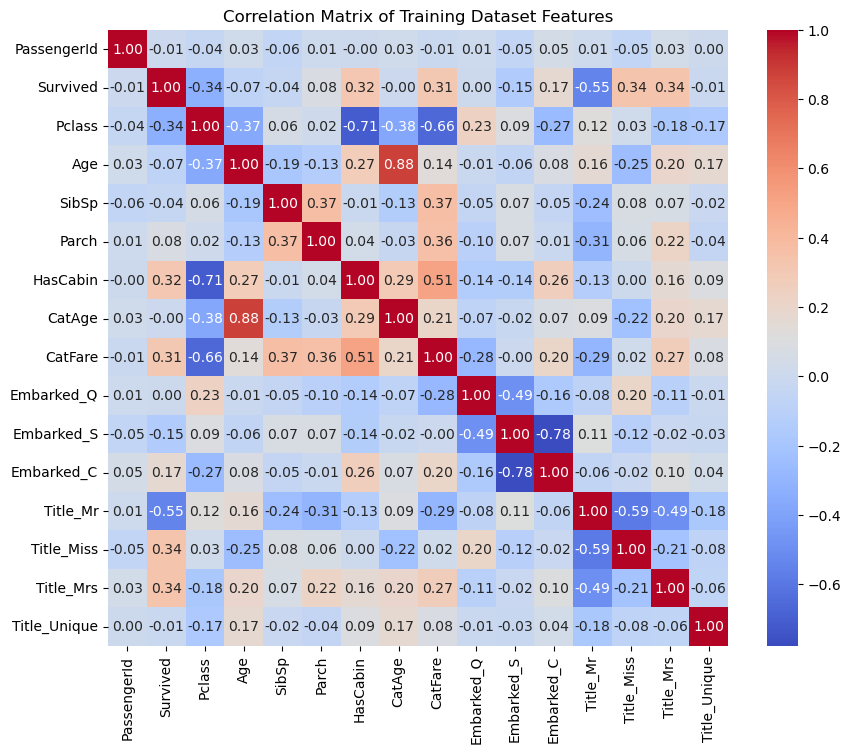

In [267]:
#Task 4

# Creating a copy of the DF to avoid error message "ValueError: could not convert string to float: 'male'"
df_temp_task4 = Titanic_cleaned_data
df.to_csv('../Lab3/Data3/df_temp_task4.csv')

df_temp_task4 = df_temp_task4.drop(columns=['Sex'])
df_temp_task4 = df_temp_task4.drop(columns=['Title'])

#compute correlation matrix
correlation_matrix = df_temp_task4.corr()

#visualization of the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Training Dataset Features')
plt.show()

#Which features are most strongly correlated with 'Survived'?
# Pclass and Title_mr(?)
